In [57]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score



In [58]:

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from keras.preprocessing import text, sequence

import nltk
import re
import matplotlib.pyplot as plt

In [59]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [60]:
##TODO

csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_data/liwc_response_context_train.csv'
#csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_Features_train_data'
Train_df = pd.read_csv(csv_file)
Train_df = Train_df.loc[:, ~Train_df.columns.str.contains('^Unnamed')]
# print out the first few rows of data info
Train_df.head(5)

#These are the most useful features per SHAP 


##ALL
#Train_df_select = Train_df[['vader_compound','pro_count_percent','vader_pos','vader_neg','context0_emotion','noun_count_percent','time','char_count','adv_count_percent','you','cos_sim1','vader_neu','adj_count_percent','cos_sim','context1_emotion','pronoun','incl','discrep','upper_case_word_count','negate']].copy()

#Train_df_select = Train_df[['vader_compound','pro_count_percent','vader_pos','vader_neg','context0_emotion','noun_count_percent','time','char_count','adv_count_percent','you','cos_sim1','vader_neu','adj_count_percent','cos_sim','context1_emotion','pronoun','incl','discrep','upper_case_word_count','negate','val_diff_c1_resp','aro_diff_c1_resp','dom_diff_c1_resp']].copy()

##Top few
#Train_df_select = Train_df[['vader_compound', 'context0_sentiment', 'word_density','posemo','work','cos_sim1','you','ppron','Response_emotion','ipron','vader_neu','cos_sim','punctuation_count','char_count','negemo','noun_count_percent']].copy()


,social,humans,funct,conj,cogmech,incl,verb,auxverb,future,discrep,past,inhib,preps,space,relativ,work,pronoun,ppron,you,affect,negemo,anx,adverb,anger,certain,present,cause,article,ipron,posemo,quant,tentat,excl,motion,insight,shehe,sad,achieve,they,negate,money,percept,see,number,hear,swear,time,filler,leisure,death,i,bio,sexual,health,friend,ingest,assent,we,body,feel,relig,home,family,nonfl,label,concat_tweet,context/0,context/1,response_emotion,context0_emotion,cos_sim,cos_sim1,Emotional_sim_response/context/0,Emotional_sim_response/context/1,response,noun_count_percent,adj_count_percent,adv_count_percent,pro_count_percent,char_count,word_density,punctuation_count,upper_case_word_count,vader_pos,vader_neg,vader_neu,vader_compound,context1_emotion,val_diff_c0_resp,aro_diff_c0_resp,dom_diff_c0_resp,val_diff_c1_resp,aro_diff_c1_resp,dom_diff_c1_resp,tokenized_text
0,11,3,34,5,16,6,17,10,3,4,2,1,6,2,3,1,9,7,6,5,2,1,2,1,2,9,1,1,2,3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,A minor child deserves privacy and should be k...,A minor child deserves privacy and should be k...,If your child isn't named Barron ... #BeBest...,sadness,sadness,0.881,0.880,0.082695,0.862724,I don't get this .. obviously you do car...,0.250000,0.050000,0.125000,0.112500,5.075000,0.063437,0.250000,0.025000,0.000,0.209,0.791,0.02995,joy,0.893167,-0.533667,0.697667,-0.597500,0.015000,0.331667,"['A', 'minor', 'child', 'deserves', 'privacy',..."
1,8,0,22,2,6,2,6,4,0,0,1,0,6,2,2,0,7,6,1,2,2,0,3,1,0,4,3,2,1,0,0,0,1,0,0,3,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,Why is he a loser ? He's just a Press Secr...,Why is he a loser ? He's just a Press Secr...,having to make up excuses of why your crow...,anger,sadness,0.775,0.853,0.016047,0.383406,trying to protest about . Talking about hi...,0.244444,0.022222,0.066667,0.155556,4.933333,0.109630,0.111111,0.022222,0.000,0.227,0.773,0.05840,sadness,0.675000,0.028333,0.718333,-0.291667,-0.088333,0.416667,"['Why', 'is', 'he', 'a', 'loser', '?', 'He', ""..."
2,4,0,19,1,5,0,4,2,0,0,0,0,8,2,2,1,4,4,2,2,1,1,1,0,1,4,1,4,0,1,0,0,1,0,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,Donald J . Trump is guilty as charged . The ev...,Donald J . Trump is guilty as charged . The ev...,I ’ ll remember to not support you at the bo...,anger,anger,0.816,0.824,0.006215,0.675138,He makes an insane about of money from t...,0.172414,0.051724,0.017241,0.103448,4.896552,0.084423,0.172414,0.051724,0.083,0.185,0.732,0.16740,joy,-0.032500,1.403333,0.054167,-0.568333,2.245833,-0.135833,"['Donald', 'J', '.', 'Trump', 'is', 'guilty', ..."
3,10,1,29,5,11,3,11,4,0,0,5,0,6,0,1,4,10,8,0,6,3,0,2,3,1,6,3,1,2,3,0,0,3,0,1,5,0,2,3,2,0,5,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,Jamie Raskin tanked Doug Collins . Collins loo...,Jamie Raskin tanked Doug Collins . Collins loo...,But not half as stupid as Schiff looks . Peo...,anger,sadness,0.728,0.829,0.124028,0.721566,Meanwhile Trump won't even release his SAT...,0.194805,0.090909,0.116883,0.129870,5.610390,0.072862,0.155844,0.025974,0.125,0.131,0.744,0.44215,joy,1.161111,0.288889,0.964444,-0.630889,0.284222,-0.023556,"['Jamie', 'Raskin', 'tanked', 'Doug', 'Collins..."
4,4,0,27,1,5,1,6,3,0,0,5,1,7,6,11,0,3,2,1,1,0,0,2,0,2,1,0,5,1,1,5,0,0,1,1,0,0,1,1,0,0,1,0,2,1,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,Man ... y ’ all gone “ both sides ” the apocal...,Man ... y ’ all gone “ both sides ” the apocal...,They already did . Obama said many times dur...,joy,sadness,0.896,0.913,0.080290,0.333787,Pretty Sure the Anti-Lincoln Crowd Claimed...,0.129032,0.053763,0.053763,0.043011,5.247312,0.056423,0.268817,0.021505,0.101,0.054,0.845,0.78595,anger,-0.466000,1.134000,0.010000,-0.740625,0.981875,-0.687500,"['Man', '...', 'y', '’', 'all', 'gone', '“', '..."


In [61]:
##TODO

csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_data/liwc_response_context_test.csv'
#csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_Features_test_data'
Test_df = pd.read_csv(csv_file)
Test_df = Test_df.loc[:, ~Test_df.columns.str.contains('^Unnamed')]
# print out the first few rows of data info
Test_df.head(5)

# These are the most useful features per SHAP
#ALL
#Test_df_select = Test_df[['vader_compound','pro_count_percent','vader_pos','vader_neg','context0_emotion','noun_count_percent','time','char_count','adv_count_percent','you','cos_sim1','vader_neu','adj_count_percent','cos_sim','context1_emotion','pronoun','incl','discrep','upper_case_word_count','negate']].copy()

#Test_df_select = Test_df[['vader_compound','pro_count_percent','vader_pos','vader_neg','context0_emotion','noun_count_percent','time','char_count','adv_count_percent','you','cos_sim1','vader_neu','adj_count_percent','cos_sim','context1_emotion','pronoun','incl','discrep','upper_case_word_count','negate','val_diff_c1_resp','aro_diff_c1_resp','dom_diff_c1_resp']].copy()

##Top few
#Test_df_select = Test_df[['vader_compound', 'context0_sentiment', 'word_density','posemo','work','cos_sim1']].copy()

,Emotional_sim_response/context/0,Emotional_sim_response/context/1,funct,adverb,time,relativ,pronoun,ipron,affect,negemo,cogmech,discrep,verb,past,social,ppron,i,cause,they,auxverb,present,posemo,preps,excl,leisure,conj,incl,humans,certain,achieve,tentat,space,filler,shehe,anger,article,percept,hear,quant,we,motion,insight,feel,work,home,inhib,number,bio,body,swear,negate,you,future,assent,anx,nonfl,sad,money,see,relig,sexual,health,family,death,friend,ingest,label,context/0,context/1,concat_tweet,response_emotion,context0_emotion,cos_sim,cos_sim1,response,noun_count_percent,adj_count_percent,adv_count_percent,pro_count_percent,char_count,word_density,punctuation_count,upper_case_word_count,vader_pos,vader_neg,vader_neu,vader_compound,context1_emotion,val_diff_c0_resp,aro_diff_c0_resp,dom_diff_c0_resp,val_diff_c1_resp,aro_diff_c1_resp,dom_diff_c1_resp,tokenized_text
0,0.539945,0.033805,25,4,9,9,12,6,6,2,12,1,4,2,9,6,2,5,3,1,2,4,4,2,2,5,2,1,1,4,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NOT_SARCASM,Well now that ’ s problematic AF <URL>,My 5 year old ... asked me why they are ma...,Well now that ’ s problematic AF <URL> My 5...,joy,anger,0.817,0.828,"My 3 year old , that just finished readi...",0.159091,0.113636,0.102273,0.090909,4.647727,0.052815,0.261364,0.045455,0.171,0.131,0.698,0.82390,anger,3.091111,-0.618333,1.326667,-0.250556,0.063333,0.130000,"['Well', 'now', 'that', '’', 's', 'problematic..."
1,0.789342,0.100227,33,4,6,12,5,3,5,2,10,0,8,4,4,2,0,3,0,5,4,3,9,2,0,1,0,0,5,2,0,5,0,1,1,8,3,2,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,Last week the Fake News said that a section of...,The mainstream media doesn't report the fact...,Last week the Fake News said that a section of...,joy,fear,0.859,0.849,How many verifiable lies has he told now ?...,0.169811,0.103774,0.075472,0.037736,5.122642,0.048327,0.188679,0.018868,0.105,0.097,0.798,0.46140,joy,-0.110952,-0.225714,-0.175238,-0.327143,0.161964,-0.268214,"['Last', 'week', 'the', 'Fake', 'News', 'said'..."
2,0.676308,0.198786,29,3,4,9,5,2,6,4,9,1,10,6,5,3,0,0,0,4,4,2,7,2,5,2,1,0,0,2,0,4,0,3,3,7,0,0,0,0,1,1,0,1,0,3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SARCASM,Let ’ s Aplaud Brett When he deserves it he ...,He did try keep korkmaz in in the 4th quar...,Let ’ s Aplaud Brett When he deserves it he ...,anger,joy,0.807,0.853,Maybe Docs just a scrub of a coach ... I...,0.168539,0.089888,0.056180,0.067416,5.067416,0.056937,0.157303,0.044944,0.058,0.130,0.812,0.13345,anger,-1.513750,-0.527500,-0.505000,-0.158750,0.330000,0.012500,"['Let', '’', 's', 'Aplaud', 'Brett', 'When', '..."
3,0.219656,0.038484,41,3,2,11,13,6,7,4,12,0,10,2,11,7,0,0,0,5,6,3,13,1,0,4,6,3,2,2,1,9,0,4,4,3,0,0,2,2,0,1,0,2,0,1,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,NOT_SARCASM,Women generally hate this president . What's u...,I've hated him before he was placed in offic...,Women generally hate this president . What's u...,anger,anger,0.814,0.892,is just a cover up for the real hate insid...,0.160494,0.037037,0.061728,0.123457,4.530864,0.055937,0.172840,0.024691,0.131,0.182,0.688,0.12500,anger,1.579000,-1.195000,1.049000,-0.767333,0.451333,-0.548000,"['Women', 'generally', 'hate', 'this', 'presid..."
4,0.812410,0.203423,48,6,0,6,12,5,9,5,17,0,10,3,9,7,0,1,4,8,3,4,13,4,0,4,1,0,5,0,5,6,0,1,3,3,1,0,4,0,0,3,1,0,0,1,0,0,0,0,2,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,NOT_SARCASM,"Dear media Remoaners , you excitedly sharing c...",When Spiked claim that Brexiteers knew exact...,"Dear media Remoaners , you excitedly sharing c...",anger,anger,0.861,0.875,The irony being that he even has to ask ...,0.165138,0.082569,0.100917,0.100917,5.018349,0.046040,0.165138,0.009174,0.133,0.091,0.775,0.82370,anger,0.328077,-0.374615,-0.044038,0.297667,-0.080000,-0.069167,"['Dear', 'media', 'Remoaners', ',', 'you', 'ex..."


In [65]:
X_train = Train_df

X_test= Test_df

y_train= Train_df['label']

y_test = Test_df['label']

In [66]:

X_test['response_emotion'] = X_test['response_emotion'].astype('category').cat.codes
X_test['context1_emotion'] = X_test['context1_emotion'].astype('category').cat.codes
X_test['context0_emotion'] = X_test['context0_emotion'].astype('category').cat.codes



X_train['context1_emotion'] = X_train['context1_emotion'].astype('category').cat.codes
X_train['response_emotion'] = X_train['response_emotion'].astype('category').cat.codes
X_train['context0_emotion'] = X_train['context0_emotion'].astype('category').cat.codes

In [67]:

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [68]:
X_test = X_test.drop(['tokenized_text','label','response','context1_emotion','context/0','context/1','concat_tweet','response_emotion','context0_emotion'], axis=1)

In [69]:
X_train = X_train.drop(['tokenized_text','label','response','context1_emotion','context/0','context/1','concat_tweet','response_emotion','context0_emotion'], axis=1)

In [42]:
#X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
# fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

# predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, y_test),metrics.precision_score(predictions, y_test),metrics.recall_score(predictions, y_test),metrics.f1_score(predictions, y_test)


# Results on Test data

# Naive Bayes


In [71]:
from sklearn.naive_bayes import GaussianNB

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), X_train, y_train, X_test)
print ("NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

NB, :  A: 0.54 P: 0.52 R: 0.54 F1: 0.53


# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
accuracy, precision, recall,fl  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), X_train, y_train, X_test)
print ("random Forest: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

random Forest:  A: 0.6 P: 0.64 R: 0.6 F1: 0.53


# SVM

In [73]:
from sklearn.svm import SVC

accuracy, precision, recall,f1  = train_model(svm.SVC(), X_train, y_train, X_test)
print ("Svm: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

Svm:  A: 0.52 P: 0.43 R: 0.53 F1: 0.48


# LogisticRegression

In [75]:


accuracy, precision, recall,f1  = train_model(LogisticRegression(random_state=0,max_iter=500), X_train, y_train, X_test)
print ("Logistic Regression: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

Logistic Regression:  A: 0.56 P: 0.84 R: 0.54 F1: 0.66


C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Test on Train data


C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

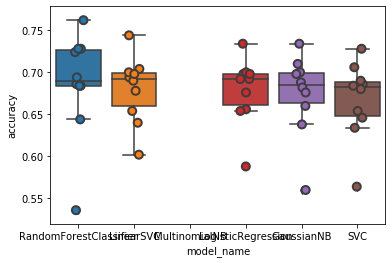

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=500),
    GaussianNB(),
    svm.SVC(),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [22]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GaussianNB                0.6746
LinearSVC                 0.6804
LogisticRegression        0.6788
MultinomialNB                NaN
RandomForestClassifier    0.6870
SVC                       0.6672
Name: accuracy, dtype: float64

In [23]:
cv_df.groupby('model_name').accuracy.max()

model_name
GaussianNB                0.734
LinearSVC                 0.744
LogisticRegression        0.734
MultinomialNB               NaN
RandomForestClassifier    0.762
SVC                       0.728
Name: accuracy, dtype: float64

In [24]:
cv_df.groupby('model_name').accuracy.min()

model_name
GaussianNB                0.560
LinearSVC                 0.602
LogisticRegression        0.588
MultinomialNB               NaN
RandomForestClassifier    0.536
SVC                       0.564
Name: accuracy, dtype: float64